Write a code to solve the minimum of 2D function with Monte Carlo method.

/var/folders/04/r2qmcyd17sg5xm7k2qb4cm0m0000gn/T/ipykernel_19533/984982265.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


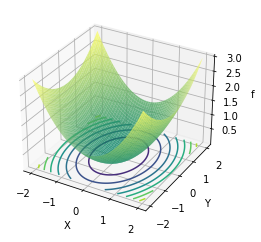

In [3]:
#%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_min, x_max = -2, 2                          # range of x
y_min, y_max = -2, 2                          # range of x

def f(x,y):
    return 1/2*x**2 + 1/4*y**2

nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)

x,y = np.meshgrid(nx,ny)

z = f2(x, y)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
cset = ax.contour(x,y,z, zdir='z', offset=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

plt.show()


In [7]:
def monte_min(npoints, f, x0, xn, y0, yn):
    
    rangex = xn - x0
    rangey = yn - y0
    
    minx = x0 + np.random.random() * rangex
    miny = y0 + np.random.random() * rangey
    
    for i in range(npoints):
        x = x0 + np.random.random() * rangex
        y = y0 + np.random.random() * rangey
        
        if f(x,y) < f(minx, miny):
            minx, miny = x, y
            
    return minx, miny, f(minx, miny)

N = [100, 1000, 10000, 100000, 1000000]

for i in N:
    xmin, ymin, fmin = monte_min(i, f, -2, 2, -2, 2)
    print("Number of points: ", i)
    print("Minimum found at (x,y) = (",xmin,',',ymin,')')
    print("Minimum value at (x,y) is: f(x,y) = ",fmin)
    print(" ")

Number of points:  100
Minimum found at (x,y) = ( -0.0573978457176767 , 0.1126018700769773 )
Minimum value at (x,y) is: f(x,y) =  0.004817051632723228
 
Number of points:  1000
Minimum found at (x,y) = ( 0.010887696343396147 , -0.046087763541367455 )
Minimum value at (x,y) is: f(x,y) =  0.0005902914528942507
 
Number of points:  10000
Minimum found at (x,y) = ( 0.003906961013464105 , 0.024631931930908735 )
Minimum value at (x,y) is: f(x,y) =  0.00015931518984259457
 
Number of points:  100000
Minimum found at (x,y) = ( -0.006075096267691649 , -0.007335632621259247 )
Minimum value at (x,y) is: f(x,y) =  3.19062738193812e-05
 
Number of points:  1000000
Minimum found at (x,y) = ( -0.0003958125374050603 , 0.0014720784010417987 )
Minimum value at (x,y) is: f(x,y) =  6.200874870869608e-07
 


Write a code to solve the minimum of 2D function using the gradient descent method with variable step size.

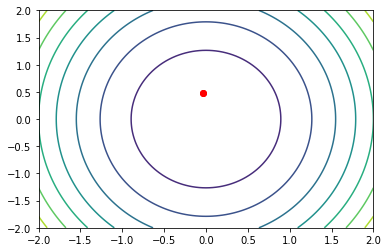

Minimum of  0.05748270604084551 found in 2 steps.


In [10]:
def gradient(f, coord, d = 0.00001):
    x = coord[0]
    y = coord[1]
    
    dfx = (f((x + d), y) - f(x, y))/d
    dfy = (f(x, (y + d)) - f(x, y))/d
    
    return np.array([dfx, dfy])

def graddescent(f, x0y0, N = 1000):
    
    xynow = x0y0
    xyprev = None
    converged = False
    xy_hist = []
    xy_hist.append(xynow)
    
    for i in range(N):
        dfnow = gradient(f, xynow)
        
        if xyprev is None:
            gamma = 0.001
        else:
            dfprev = gradient(f, xyprev)
            dfdif = dfnow - dfprev
            gamma = np.dot(xynow - xyprev, dfdif)/(np.linalg.norm(dfdif))**2
            
        xynext = xynow - gamma*dfnow
        
        
        if f(xynext[0], xynext[1]) > f(xynow[0], xynow[1]):
            coverged = True
            break
        else:
            xprev = xynow
            xynow = xynext
            xy_hist.append(xynow)
            
        return converged, np.array(xy_hist), f(xynow[0], xynow[1])

xmin, xmax = -2, 2
ymin, ymax = -2, 2

nx = np.linspace(xmin, xmax, 101)
ny = np.linspace(ymin, ymax, 101)

x, y = np.meshgrid(nx, ny)

z = f(x,y)

def xyrand(xmin, xmax, ymin, ymax):
    x0 = xmin + np.random.random()*(xmax - xmin)
    y0 = ymin + np.random.random()*(ymax - ymin)
    return [x0,y0]

x0y0 = xyrand(xmin, xmax, ymin, ymax)

coverged, xyarray, fmin = graddescent(f, x0y0, N = 1000)

plt.contour(x, y, z)
plt.plot(xyarray[:,0], xyarray[:,1], 'ro')
plt.show()

print("Minimum of ",fmin, "found in", len(xyarray), "steps.")